In [1]:
%matplotlib inline
import pandas as pd

In [2]:
titles = pd.read_csv('data/titles.csv')
titles = titles[titles['year'] <= 2015]
titles.head()

,title,year
0,Berlian si Etty,2013
1,The Mighty,1929
2,Little Black Spiders,2012
3,Twelve O'Clock High,1949
4,D4,2011


In [3]:
cast = pd.read_csv('data/cast.csv')
cast.head()

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22.0
1,Natas es Satan,1977,Ramon 'Cartucho' Pena,actor,Nigth Club Owner,NaN
2,Los tarantos,1963,'El Guisa',actor,Bailaor,25.0
3,Los tarantos,1963,'El Viti',actor,Cantaor,20.0
4,Been Down So Long It Looks Like Up to Me,1971,Murray the 'K',actor,Himself,NaN


### Using groupby(), plot the number of films that have been released each decade in the history of cinema.

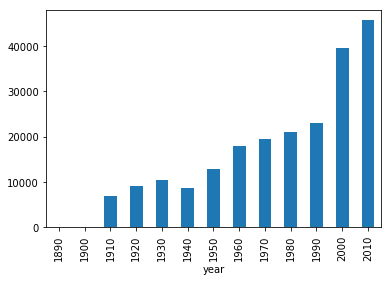

In [4]:
c=titles
c.groupby([c.year//10*10]).size().plot(kind='bar');

### Use groupby() to plot the number of "Hamlet" films made each decade.

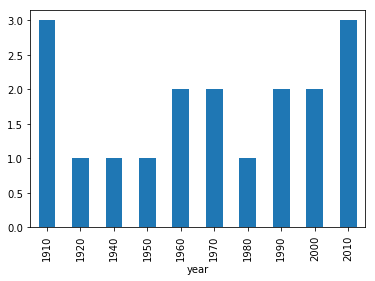

In [5]:
c=titles
c=c[c.title=='Hamlet']
c.groupby([c.year//10*10]).size().plot(kind='bar');

### How many leading (n=1) roles were available to actors, and how many to actresses, in each year of the 1950s?

In [5]:
c=cast
c=c[(c.n==1) & (c.year//10 == 195)]
c.groupby(['year', 'type']).size()

year  type   
1950  actor      625
      actress    288
1951  actor      651
      actress    285
1952  actor      613
      actress    303
1953  actor      664
      actress    313
1954  actor      636
      actress    315
1955  actor      649
      actress    285
1956  actor      668
      actress    306
1957  actor      739
      actress    314
1958  actor      716
      actress    300
1959  actor      733
      actress    327
dtype: int64

### In the 1950s decade taken as a whole, how many total roles were available to actors, and how many to actresses, for each "n" number 1 through 5?

In [7]:
c=cast
c=c[(c.n>=1) & (c.n<=5) & (c.year//10 == 195)]
c.groupby(['n', 'type']).size()

n    type   
1.0  actor      6694
     actress    3036
2.0  actor      4641
     actress    4632
3.0  actor      5655
     actress    3199
4.0  actor      5665
     actress    2879
5.0  actor      5674
     actress    2591
dtype: int64

### List, in order by year, each of the films in which Frank Oz has played more than 1 role.

In [8]:
c=cast
c=c[c.name == 'Frank Oz']
g=c.groupby(['year', 'title']).size()
g[g>1]

year  title                         
1979  The Muppet Movie                  8
1981  An American Werewolf in London    2
      The Great Muppet Caper            6
1982  The Dark Crystal                  2
1984  The Muppets Take Manhattan        7
1985  Follow That Bird                  3
dtype: int64

### List each of the characters that Frank Oz has portrayed at least twice.

In [6]:
c=cast
c=c[c.name == 'Frank Oz']
g=c.groupby(['character']).size()
g[g>1].sort_values()

character
Bert              2
Cookie Monster    2
Fozzie Bear       2
Yoda              2
Animal            3
Sam the Eagle     3
Miss Piggy        4
dtype: int64